In [7]:
from numpy import float32, uint8, ceil
from numpy import array, zeros, arange, pad, concatenate, linspace
from numpy import sin, cos, pi, absolute, angle, outer, dot, min, max, log, log2, real, imag, std, sum, sqrt, exp, clip
from numpy import logical_or
from numpy import allclose, load
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from IPython.display import Audio
import random
import csv

nsamples = 256

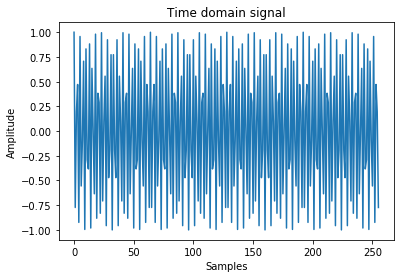

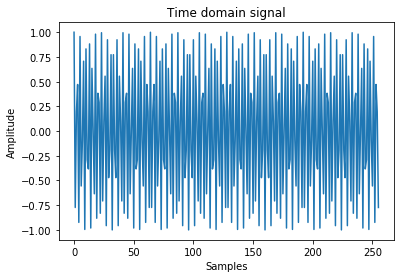

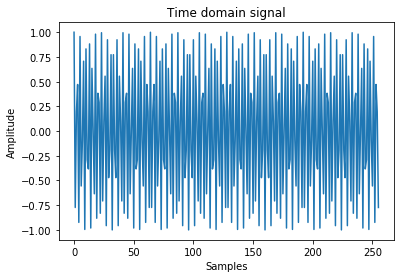

In [10]:
input_signal_real = []

with open('./DFT/real.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, =[r for r in csvReader]
    
input_signal = zeros(len(input_signal_real))
                     
for i in range(0, len(input_signal_real)):
    input_signal[i] = float(input_signal_real[i]) 
    
plt.plot(input_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time domain signal')
plt.show()
######################################################
with open('./FFT_out/real.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, =[r for r in csvReader]
    
input_signal = zeros(len(input_signal_real))
                     
for i in range(0, len(input_signal_real)):
    input_signal[i] = float(input_signal_real[i]) 
    
plt.plot(input_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time domain signal')
plt.show()

######################################################
with open('./FFT_in/real.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, =[r for r in csvReader]
    
input_signal = zeros(len(input_signal_real))
                     
for i in range(0, len(input_signal_real)):
    input_signal[i] = float(input_signal_real[i]) 
    
plt.plot(input_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time domain signal')
plt.show()

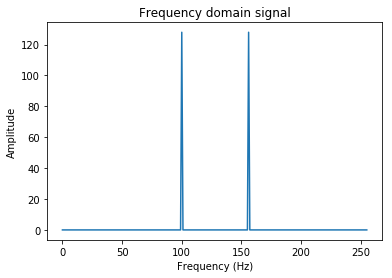

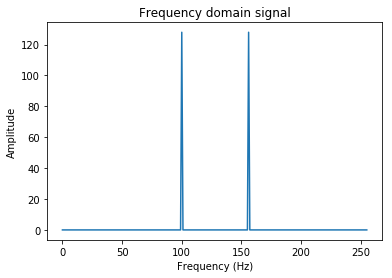

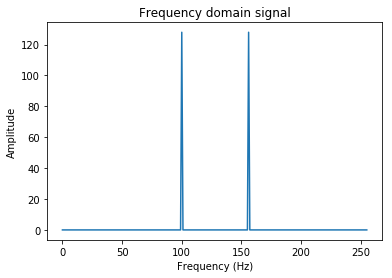

In [14]:
input_signal_real = []
input_signal_imag = []

with open('./DFT/complex.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, input_signal_imag=[r for r in csvReader]
    
input_signal = zeros(len(input_signal_real), dtype=complex)

for i in range (0, len(input_signal_real)):
    x = input_signal_real[i]
    y = input_signal_imag[i]
    input_signal[i] = float(x) + 1j* float(y)

T = 2.0
t = arange(0, T*80, T*80/nsamples )

plt.plot(sqrt(real(input_signal)**2 + imag(input_signal)**2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain signal')
plt.show()

######################################################

with open('./FFT_out/complex.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, input_signal_imag=[r for r in csvReader]
    
input_signal = zeros(len(input_signal_real), dtype=complex)

for i in range (0, len(input_signal_real)):
    x = input_signal_real[i]
    y = input_signal_imag[i]
    input_signal[i] = float(x) + 1j* float(y)

T = 2.0
t = arange(0, T*80, T*80/nsamples )

plt.plot(sqrt(real(input_signal)**2 + imag(input_signal)**2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain signal')
plt.show()

######################################################

with open('./FFT_in/complex.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, input_signal_imag=[r for r in csvReader]
    
input_signal = zeros(len(input_signal_real), dtype=complex)

for i in range (0, len(input_signal_real)):
    x = input_signal_real[i]
    y = input_signal_imag[i]
    input_signal[i] = float(x) + 1j* float(y)

T = 2.0
t = arange(0, T*80, T*80/nsamples )

plt.plot(sqrt(real(input_signal)**2 + imag(input_signal)**2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain signal')
plt.show()

In [37]:
nsamples_array = []
DFT_time = []
FFT_time = []
FFT2_time = []

with open('./Performance/performance_long.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    nsamples_array, DFT_time, FFT_time, FFT2_time=[r for r in csvReader]
    
# x = arange(10)

# fig = go.Figure(data=go.Scatter(x=x, y=x**2))
# fig.show()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=nsamples_array, y=DFT_time,
                    mode='lines+markers',
                    name='DFT',line=dict(width=1)), row=1, col=1)
fig.add_trace(go.Scatter(x=nsamples_array, y=FFT_time,
                    mode='lines+markers',
                    name='FFT out-of-place', line=dict(width=1)), row=1, col=1)

fig.add_trace(go.Scatter(x=nsamples_array, y=FFT2_time,
                    mode='lines+markers',
                    name='FFT in-place',line=dict(width=1)), row=1, col=1)

fig.add_trace(go.Scatter(x=nsamples_array, y=FFT_time,
                    mode='lines+markers',
                    name='FFT out-of-place'), row=1, col=2)

fig.add_trace(go.Scatter(x=nsamples_array, y=FFT2_time,
                    mode='lines+markers',
                    name='FFT in-place'), row=1, col=2)

fig.update_layout(title='Performance Comparison between DFT and FFT over Different Sample Size',
                   xaxis_title='Number of samples',
                   yaxis_title='Average computation time (ms)')
# yaxis_type="log"
fig.show()

In [42]:
with open('./FFT_in/real.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, =[r for r in csvReader]
    
input_signal = zeros(len(input_signal_real))
                     
for i in range(0, len(input_signal_real)):
    input_signal[i] = float(input_signal_real[i]) 
    
##################
with open('./FFT_in/complex.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    input_signal_real, input_signal_imag=[r for r in csvReader]
    
input_signal2 = zeros(len(input_signal_real), dtype=complex)

for i in range (0, len(input_signal_real)):
    x = input_signal_real[i]
    y = input_signal_imag[i]
    input_signal2[i] = float(x) + 1j* float(y)

T = 2.0
t2 = arange(0, T*80, T*80/nsamples )

    
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
t= arange(nsamples)
fig.add_trace(go.Scatter(x=t, y=input_signal,
                    mode='lines',
                    name='Time-domain signal',line=dict(width=1)), row=1, col=1)

fig.add_trace(go.Scatter(x=t, y=sqrt(real(input_signal2)**2 + imag(input_signal2)**2),
                    mode='lines',
                    name='Frequency-domain signal', line=dict(width=1)), row=1, col=2)


In [7]:
def complexExp(x : float32):
    arg = 2 * pi * x 
    return cos(arg) + 1j * sin(arg)

In [8]:
def DFT(inSignal : complex, s : int = -1): 
    y = zeros(inSignal.shape, dtype=complex)
    
    # Hint 0: Use the complexExp function
    N = inSignal.size

    for x in range(0, N):
        for k in range(0, N):
            y[x] = y[x] + inSignal[k] * complexExp((s * k * x) / N )
    
    return y

In [33]:
def generate_signal():
    nperiod = 1
    sampling_time_rad = nperiod * 2 * pi 
#     sampling_time_deg = nperiod * 360
    
    t_resolution_rad = sampling_time_rad / nsamples
#     t_resolution_deg = sampling_time_deg / nsamples
    
    signal = zeros(nsamples)
    
    for i in range(0, nsamples):
        t_rad = i * t_resolution_rad
#         t_deg = i * t_resolution_deg
        
        signal[i] = cos(150 * t_rad)
#         signal[i] = 5 + 4*cos(2 * t_rad) + 2*cos(8 * t_rad - pi/2) + 3*cos(32 * t_rad + pi/2)
        
    return signal

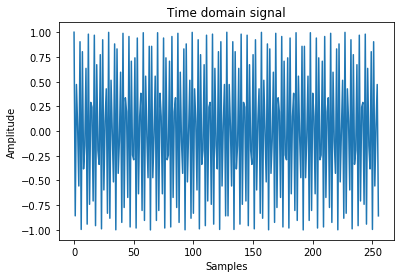

In [96]:
time_signal = generate_signal()

plt.plot(time_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time domain signal')
plt.show()

In [35]:
freq_signal = DFT(time_signal)

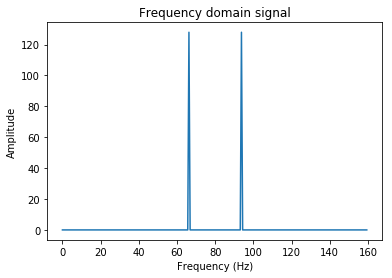

In [36]:
T = 2.0
t = arange(0, T*80, T*80/nsamples )

plt.plot(t,absolute(freq_signal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain signal')
plt.show()

In [99]:
def FFT(inSignal : complex, s : int = -1):
    N = inSignal.size
    output = zeros(N, dtype=complex)
    
    # Ensure that N has power-of-2 length
    try:
        assert((N & (N - 1) == 0) and N != 0)
    except:
        raise Exception("N is not a power-of-two!")
    
    # Recursively compute the FFT
    
    # Base case (see the note below on optionally modifying this case)
    if N == 1:
        return inSignal
    
    f_e_bar = FFT(inSignal[::2], s)
    f_o_bar = FFT(inSignal[1::2], s)
    
    w = complexExp(s * arange(N) / N)
    
    output = concatenate([f_e_bar + w[: int(N / 2)] * f_o_bar,
                               f_e_bar + w[int(N / 2) :] * f_o_bar])
    
    return output

In [101]:
freq_signal = FFT(time_signal)

IndexError: index 1 is out of bounds for axis 0 with size 1

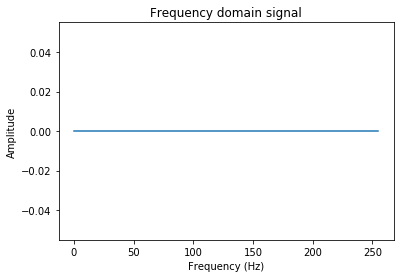

In [83]:
T = 2.0
t = arange(0, T*80, T*80/nsamples )

plt.plot(absolute(freq_signal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain signal')
plt.show()

In [66]:
a = arange(10)
b = arange(0,20,2)
print(a,b,a*b)

[0 1 2 3 4 5 6 7 8 9] [ 0  2  4  6  8 10 12 14 16 18] [  0   2   8  18  32  50  72  98 128 162]
